# PROJECT NO.1


> First of all, we import the needed libraries and datasets into our notebook, then:
- We can check the table's info one by one
- found the key column
- found the null object or any other misinformation like duplicates
- mange the problems 
- Convert the dtypes to appropriate ones according to the values
- start the cleaning process

###### and do any other preprocessings necessary for further analysis ...



In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [64]:
home_team_dataframe = pd.DataFrame()
for file in os.listdir("raw/home_team_parquet"):
    single_stats = pd.read_parquet("raw/home_team_parquet/" + file)
    home_team_dataframe = pd.concat([home_team_dataframe, single_stats], axis= 'rows', ignore_index=True)

home_team_dataframe.head(10)

,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
0,11673958,Barrios Vera T.,barrios-vera-tomas,M,2915,Santiago,"Chillan, Chile",1.91,83,right-handed,2014,265608,646273,132834,103,BAR,Chile,"Barrios Vera, Tomás"
1,11673962,Tirante T.,tirante-thiago-agustin,M,1519,La Plata,"La Plata, Argentina",1.85,78,right-handed,None,249335,430793,221515,123,TIR,Argentina,"Tirante, Thiago Agustin"
2,11673963,Heide G.,heide-gustavo,M,1177,None,Sao Paulo,1.88,None,right-handed,None,36929,87230,302582,247,HEI,Brazil,"Heide, Gustavo"
3,11673993,Ajduković D.,ajdukovic-duje,M,1293,"Zagreb, Croatia","Split, Croatia",1.88,75,right-handed,None,63678,198866,207081,143,AJD,Croatia,"Ajduković, Duje"
4,11674000,Escobedo E.,escobedo-ernesto,M,680,"West Covina, CA, USA","Los Angeles, CA, USA",1.85,82,right-handed,2014,84375,1280430,80491,404,ESC,Mexico,"Escobedo, Ernesto"
5,11674008,Shelbayh A.,shelbayh-abedallah,M,1411,None,Amman,1.80,None,None,None,104721,128500,307383,187,SHE,Jordan,"Shelbayh, Abedallah"
6,11674011,Crawford O.,crawford-oliver,M,442,"Spartanburg, SC","Spartanburg, SC, USA",1.80,84,right-handed,None,40191,113045,213057,215,CRA,USA,"Crawford, Oliver"
7,11674026,Gasquet R.,gasquet-richard,M,5025,"Neuchatel, Switzerland","Beziers, France",1.83,79,right-handed,2002,680075,17234183,14414,76,GAS,France,"Gasquet, Richard"
8,11674032,Machač T.,machac-tomas,M,2381,Czech republic,"Beroun, Czech Republic",1.83,73,right-handed,None,358816,873971,238300,78,MAC,Czech Republic,"Machač, Tomáš"
9,11674034,Draper J.,draper-jack,M,5892,London,"Sutton, England",1.93,75,left-handed,2018,614923,1519143,258749,61,DRA,United Kingdom,"Draper, Jack"


In [5]:
home_team_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   match_id       436 non-null    int64  
 1   name           436 non-null    object 
 2   slug           436 non-null    object 
 3   gender         436 non-null    object 
 4   user_count     436 non-null    int64  
 5   residence      112 non-null    object 
 6   birthplace     245 non-null    object 
 7   height         237 non-null    float64
 8   weight         112 non-null    object 
 9   plays          181 non-null    object 
 10  turned_pro     65 non-null     object 
 11  current_prize  427 non-null    object 
 12  total_prize    432 non-null    object 
 13  player_id      436 non-null    int64  
 14  current_rank   430 non-null    object 
 15  name_code      436 non-null    object 
 16  country        435 non-null    object 
 17  full_name      436 non-null    object 
dtypes: float64

---

## Overview of `home_team_dataframe`
Total entries: 436 (Rows)
Total columns: 18

Key Observations and Analysis for Each Column:

- **match_id** (int64, 436 non-null):
All entries are present, making this a good candidate for the primary key linking this table with other tables.
- **name** (object, 436 non-null):
Each row contains the name of the player, and all values are non-null, which means we have complete data for player names.
- **slug** (object, 436 non-null):
This column contains URL-friendly names for the players. Since all entries are non-null, it seems reliable, but its utility depends on how it's used in the system.
- **gender** (object, 436 non-null):
All entries are present. However, given that all rows in the sample you've provided are male (M), there may be little variation, depending on the dataset's gender diversity.
- **user_count** (int64, 436 non-null):
This column represents the number of users or fans the player has. It’s fully populated and can be useful for analysis related to player popularity.
- **residence** (object, 112 non-null):
Only 112 non-null entries means around 74% of the data is missing. This column could either be discarded or filled using some imputation techniques if this information is relevant to your analysis.
- **birthplace** (object, 245 non-null):
Around 44% missing values. Birthplace data is incomplete, but if necessary, you could analyze the available data for geographical insights. Missing data could either be filled or excluded depending on its relevance.
- **height** (float64, 237 non-null):
Height has 45% missing values, which is significant. This can affect analysis involving physical attributes like height-to-performance correlation. Imputation strategies could be considered if height data is essential.
- **weight** (object, 112 non-null):
Over 74% missing values, making this field highly incomplete. Depending on your analysis, you might either drop this column or replace missing values with an average or median.
- **plays** (object, 181 non-null):
Represents the player's dominant hand (e.g., right-handed or left-handed). Around 58% missing data. This can be an important feature for player analysis, so it might be worthwhile to investigate ways to recover or impute the missing data.
- **turned_pro** (object, 65 non-null):
Very sparse data, with only 65 non-null entries. Given the high level of missingness (around 85%), this column may not be reliable for analysis unless it’s crucial for understanding player career timelines.
- **current_prize** (object, 427 non-null):
Almost complete, with only 9 missing values. Since this is monetary data, converting it to a numerical format (e.g., float) would be more useful for further analysis.
- **total_prize** (object, 432 non-null):
Similar to the current_prize column, this field is almost complete, and converting it to a numerical format could help analyze career earnings.
- **player_id** (int64, 436 non-null):
Like match_id, this is fully populated and acts as a unique identifier for players. It can be useful for merging with other datasets containing player-related information.
- **current_rank** (object, 430 non-null):
Mostly complete (only 6 missing entries). Current rank is an important metric in player analysis, so these missing entries should either be imputed or investigated.
- **name_code** (object, 436 non-null):
A code that represents the player’s name, typically used for scoreboards. All values are non-null, making this column fully reliable.
- **country** (object, 435 non-null):
Only 1 missing value, so this is mostly complete and useful for nationality-based analysis.
- **full_name** (object, 436 non-null):
All entries are present, but it's somewhat redundant given the presence of the name and name_code columns.

>### Analysis of Data Quality:

This table gives a detailed view of the characteristics of each home player in tennis matches. It includes personal information (e.g., residence, birthplace, height, and weight) and professional data (e.g., ranking, prize money, and handedness). The match_id serves as a key to link these players with their matches. However, the difference in the number of unique match_id values compared to other tables indicates some incomplete or missing data for certain matches in this table.


The most significant issues arise from missing data in several columns: `residence`, `birthplace`, `height`, `weight`, `plays`, and `turned_pro`. Depending on the analysis you want to perform, we might drop some of these columns 
or impute missing values.

Prize-related columns (`current_prize`, `total_prize`) should be converted to numeric types to be used effectively in statistical analysis.

`match_id` and `player_id` are good candidates for primary keys. However, some data integrity concerns arise when comparing with other tables due to different numbers of unique match_id values.

>### Suggestions for Handling the Data:

1. Address missing data:

    - Drop columns with too many missing values (e.g., turned_pro, residence).

    - Consider imputing missing values for columns like height, weight, and plays if they are relevant to your analysis.

2. Data type conversions:

    - Convert current_prize and total_prize to numeric types to enable easier statistical analysis.

3. Check for consistency:

    - Ensure that match_id is consistent across all related tables, and investigate why some tables have more or fewer unique match_id values than others.

---
### - Count the number of unique match_id values

In [6]:

num_unique_match_ids0 = home_team_dataframe['match_id'].nunique()

print(f"Number of unique match_id: {num_unique_match_ids0}")

Number of unique match_id: 436


### - Replace NaN with **mean** in `height` and `weight` 

In [7]:
home_team_dataframe['height'].fillna(home_team_dataframe['height'].mean(), inplace=True)
home_team_dataframe['weight'].fillna(home_team_dataframe['weight'].mean(), inplace=True)


### - Replace NaN with **(Mode)** in `plays`:
plays

In [8]:
#home_team_dataframe['plays'].fillna(home_team_dataframe['plays'].mode()[0], inplace=True)

### - Drop Nan in selcted columns 
### - Convert the dtypes to appropriate ones according to the values 

In [9]:
home_team_dataframe.dropna(subset=['current_prize', 'total_prize', 'country', 'current_rank'], inplace=True)


home_team_dataframe['current_prize'] = home_team_dataframe['current_prize'].astype(float)
home_team_dataframe['total_prize'] = home_team_dataframe['total_prize'].astype(float)


home_team_dataframe['gender'] = home_team_dataframe['gender'].astype('category')
home_team_dataframe['country'] = home_team_dataframe['country'].astype('category')

### - checking for Duplicate Data

In [10]:
home_team_dataframe.drop_duplicates(subset='match_id', inplace=True)


### - Calculating the Percentage of Missing Values

This technique Helps us to manage misinformation.In this notebook I used it many times but show it just once here.


In [11]:

missing_percentage = home_team_dataframe.isnull().mean() * 100
print(missing_percentage)


match_id          0.000000
name              0.000000
slug              0.000000
gender            0.000000
user_count        0.000000
residence        73.696682
birthplace       42.180095
height            0.000000
weight            0.000000
plays            57.345972
turned_pro       84.597156
current_prize     0.000000
total_prize       0.000000
player_id         0.000000
current_rank      0.000000
name_code         0.000000
country           0.000000
full_name         0.000000
dtype: float64


### - Drop columns with too many missing values and low intrest

In [12]:

home_team_dataframe.drop(columns=['turned_pro', 'residence', 'birthplace'], inplace=True, errors='ignore')


In [13]:
home_team_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422 entries, 0 to 434
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   match_id       422 non-null    int64   
 1   name           422 non-null    object  
 2   slug           422 non-null    object  
 3   gender         422 non-null    category
 4   user_count     422 non-null    int64   
 5   height         422 non-null    float64 
 6   weight         422 non-null    float64 
 7   plays          180 non-null    object  
 8   current_prize  422 non-null    float64 
 9   total_prize    422 non-null    float64 
 10  player_id      422 non-null    int64   
 11  current_rank   422 non-null    object  
 12  name_code      422 non-null    object  
 13  country        422 non-null    category
 14  full_name      422 non-null    object  
dtypes: category(2), float64(4), int64(3), object(6)
memory usage: 49.6+ KB


In [14]:
home_team_score_dataframe = pd.DataFrame()
for file in os.listdir("raw/home_team_score_parquet"):
    single_stats = pd.read_parquet("raw/home_team_score_parquet/" + file)
    home_team_score_dataframe = pd.concat([home_team_score_dataframe, single_stats], axis= 'rows', ignore_index=True)

home_team_score_dataframe.head(10)

,match_id,current_score,display_score,period_1,period_2,period_3,period_4,period_5,period_1_tie_break,period_2_tie_break,period_3_tie_break,period_4_tie_break,period_5_tie_break,normal_time
0,11673958,0,0,2,4,None,None,None,None,None,None,None,None,None
1,11673962,None,None,None,None,None,None,None,None,None,None,None,None,None
2,11673963,2,2,7,6,None,None,None,None,None,None,None,None,None
3,11673993,1,1,6,1,1,None,None,None,None,None,None,None,None
4,11674000,0,0,4,1,None,None,None,None,None,None,None,None,None
5,11674008,2,2,4,6,6,None,None,None,None,None,None,None,None
6,11674011,1,1,2,7,3,None,None,None,None,None,None,None,None
7,11674026,0,0,4,1,None,None,None,None,None,None,None,None,None
8,11674032,2,2,6,4,6,None,None,None,None,None,None,None,None
9,11674034,2,2,7,6,None,None,None,None,None,None,None,None,None


In [15]:
home_team_score_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   match_id            764 non-null    int64 
 1   current_score       739 non-null    object
 2   display_score       739 non-null    object
 3   period_1            746 non-null    object
 4   period_2            740 non-null    object
 5   period_3            181 non-null    object
 6   period_4            0 non-null      object
 7   period_5            0 non-null      object
 8   period_1_tie_break  17 non-null     object
 9   period_2_tie_break  20 non-null     object
 10  period_3_tie_break  4 non-null      object
 11  period_4_tie_break  0 non-null      object
 12  period_5_tie_break  0 non-null      object
 13  normal_time         0 non-null      object
dtypes: int64(1), object(13)
memory usage: 83.7+ KB


---
## Analysis of `home_team_score_dataframe`

#### Overview:
This table tracks the scores for the home team across different periods (likely sets in tennis) for various matches, identified by the match_id. The table includes columns for the current score, display score, and the breakdown of scores across multiple periods (up to five). It also tracks if any of these periods involved a tie-break.

#### Key Points from Data Sample:
  - **match_id**: Uniquely identifies each match. This column is complete with no missing values.
  - **current_score & display_score**: These columns provide the score representation for each match but have a few missing values. Out of 764 rows, 739 rows have non-null values, indicating some incomplete score data.
  - **period_1 to period_3**: These columns represent the scores for the first three periods (likely sets) of the matches. Most of the matches have data for the first two periods, but only 181 matches contain data for a third period, suggesting that many matches end within two sets.
  - **period_4 & period_5**: These columns are entirely null, indicating that none of the matches in the dataset extended beyond three periods, or the data is simply not recorded.
  - **Tie-break Data (period_1_tie_break to period_5_tie_break)**: The tie-break data is sparsely populated, with very few instances of tie-breaks being recorded. Most of the tie-breaks occur in period 1 or period 2.

#### Observations:

**Missing Data**: A significant portion of the dataset is missing values, especially for periods 3, 4, and 5, and the tie-break columns. Period 4, period 5, and their tie-breaks are entirely null, so further analysis should focus on periods 1 to 3.

**Match Length**: Most matches seem to last only 2 or 3 periods (sets), as period 3 has much fewer non-null values, and periods 4 and 5 are empty.
Tie-breaks: Very few tie-breaks are recorded, which could mean that only a handful of matches are closely contested.

____
### - Dropping NaN values in specific columns

In [16]:

home_team_score_dataframe.dropna(subset=['current_score', 'display_score', 'period_1' , 'period_2',], inplace=True)


### - Dropping rows with full NaN column

In [17]:
home_team_score_dataframe.drop(columns=['normal_time', 'period_5_tie_break', 'period_4_tie_break', 'period_4', 'period_5'], inplace=True)

### - onvert the columns to numeric

In [18]:

home_team_score_dataframe['current_score'] = pd.to_numeric(home_team_score_dataframe['current_score'], errors='coerce')
home_team_score_dataframe['display_score'] = pd.to_numeric(home_team_score_dataframe['display_score'], errors='coerce')

### - Replace Null Values with Zero for Future Analysis
### - Convert the dtypes to appropriate ones according to the values 

In [19]:

home_team_score_dataframe['period_3'].fillna(0, inplace=True)


home_team_score_dataframe['period_3'] = home_team_score_dataframe['period_3'].astype(int)
home_team_score_dataframe['period_1'] = home_team_score_dataframe['period_1'].astype(int)
home_team_score_dataframe['period_2'] = home_team_score_dataframe['period_2'].astype(int)

### - Droping duplicates

In [20]:
home_team_score_dataframe.drop_duplicates(subset='match_id', inplace=True)

In [21]:
home_team_score_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736 entries, 0 to 763
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   match_id            736 non-null    int64 
 1   current_score       736 non-null    int64 
 2   display_score       736 non-null    int64 
 3   period_1            736 non-null    int32 
 4   period_2            736 non-null    int32 
 5   period_3            736 non-null    int32 
 6   period_1_tie_break  17 non-null     object
 7   period_2_tie_break  20 non-null     object
 8   period_3_tie_break  4 non-null      object
dtypes: int32(3), int64(3), object(3)
memory usage: 48.9+ KB


In [22]:

num_unique_match_ids0 = home_team_score_dataframe['match_id'].nunique()

print(f"Number of unique match_id: {num_unique_match_ids0}")

Number of unique match_id: 736


### - Number of common match_ids between `home_team_dataframe` and `home_team_score_dataframe`

In [23]:
home_team_score_match_ids = set(home_team_score_dataframe['match_id'])
home_team_match_ids = set(home_team_dataframe['match_id'])


common_match_ids = home_team_score_match_ids.intersection(home_team_match_ids)
common_match_count = len(common_match_ids)

print(f"Number of common match_ids : {common_match_count}")

Number of common match_ids : 409


In [65]:
away_team_dataframe = pd.DataFrame()
for file in os.listdir("raw/away_team_parquet"):
    single_stats = pd.read_parquet("raw/away_team_parquet/" + file)
    away_team_dataframe = pd.concat([away_team_dataframe, single_stats], axis= 'rows', ignore_index=True)

away_team_dataframe.head(10)

,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
0,11673958,Tirante T.,tirante-thiago-agustin,M,1519,La Plata,"La Plata, Argentina",1.85,78,right-handed,None,249335,430793,221515,123,TIR,Argentina,"Tirante, Thiago Agustin"
1,11673962,Heide G.,heide-gustavo,M,1177,None,Sao Paulo,1.88,None,right-handed,None,36929,87230,302582,247,HEI,Brazil,"Heide, Gustavo"
2,11673963,Jorda Sanchis D.,jorda-sanchis-david,M,344,Spain,"Barcelona, Spain",1.98,83,right-handed,None,27028,72338,57155,331,JOR,Spain,"Jorda Sanchis, David"
3,11673993,Roca Batalla O.,roca-batalla-oriol,M,707,Santa Coloma de Gramenet,Barcelona,1.75,75,right-handed,None,53418,317311,51100,213,ROC,Spain,"Roca Batalla, Oriol"
4,11674000,Crawford O.,crawford-oliver,M,442,"Spartanburg, SC","Spartanburg, SC, USA",1.80,84,right-handed,None,40191,113045,213057,215,CRA,USA,"Crawford, Oliver"
5,11674008,Peniston R.,peniston-ryan,M,1325,"Southend-on-sea, England","Southend-on-sea, Essex",1.80,75,left-handed,None,182028,509723,91240,179,PEN,United Kingdom,"Peniston, Ryan"
6,11674011,Shelbayh A.,shelbayh-abedallah,M,1411,None,Amman,1.80,None,None,None,104721,128500,307383,187,SHE,Jordan,"Shelbayh, Abedallah"
7,11674026,Machač T.,machac-tomas,M,2381,Czech republic,"Beroun, Czech Republic",1.83,73,right-handed,None,358816,873971,238300,78,MAC,Czech Republic,"Machač, Tomáš"
8,11674032,Draper J.,draper-jack,M,5892,London,"Sutton, England",1.93,75,left-handed,2018,614923,1519143,258749,61,DRA,United Kingdom,"Draper, Jack"
9,11674034,Van Assche L.,van-assche-luca,M,3546,None,Woluwe St Lambert,1.78,None,right-handed,None,528705,662296,335102,90,VAN,France,"Van Assche, Luca"


In [25]:
away_team_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   match_id       386 non-null    int64  
 1   name           386 non-null    object 
 2   slug           386 non-null    object 
 3   gender         386 non-null    object 
 4   user_count     386 non-null    int64  
 5   residence      116 non-null    object 
 6   birthplace     219 non-null    object 
 7   height         215 non-null    float64
 8   weight         113 non-null    object 
 9   plays          177 non-null    object 
 10  turned_pro     71 non-null     object 
 11  current_prize  374 non-null    object 
 12  total_prize    383 non-null    object 
 13  player_id      386 non-null    int64  
 14  current_rank   368 non-null    object 
 15  name_code      386 non-null    object 
 16  country        385 non-null    object 
 17  full_name      386 non-null    object 
dtypes: float64

---

### `away_team_dataframe` and `away_team_score_darafram` is the same as `home_team_dataframe` and `home_team_score_darafram` so hopefully we can do the same for them !

---

In [26]:
away_team_dataframe['height'].fillna(away_team_dataframe['height'].mean(), inplace=True)
away_team_dataframe['weight'].fillna(away_team_dataframe['weight'].mean(), inplace=True)

away_team_dataframe.dropna(subset=['current_prize', 'total_prize', 'country', 'current_rank'], inplace=True)

away_team_dataframe['current_prize'] = away_team_dataframe['current_prize'].astype(float)
away_team_dataframe['total_prize'] = away_team_dataframe['total_prize'].astype(float)

away_team_dataframe['gender'] = away_team_dataframe['gender'].astype('category')
away_team_dataframe['country'] = away_team_dataframe['country'].astype('category')

away_team_dataframe.drop_duplicates(subset='match_id', inplace=True)


away_team_dataframe.drop(columns=['turned_pro', 'residence', 'birthplace'], inplace=True, errors='ignore')



In [27]:
away_team_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363 entries, 0 to 385
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   match_id       363 non-null    int64   
 1   name           363 non-null    object  
 2   slug           363 non-null    object  
 3   gender         363 non-null    category
 4   user_count     363 non-null    int64   
 5   height         363 non-null    float64 
 6   weight         363 non-null    float64 
 7   plays          174 non-null    object  
 8   current_prize  363 non-null    float64 
 9   total_prize    363 non-null    float64 
 10  player_id      363 non-null    int64   
 11  current_rank   363 non-null    object  
 12  name_code      363 non-null    object  
 13  country        363 non-null    category
 14  full_name      363 non-null    object  
dtypes: category(2), float64(4), int64(3), object(6)
memory usage: 43.0+ KB


In [28]:

num_unique_match_ids1 = away_team_dataframe['match_id'].nunique()

print(f"Number of unique match_id: {num_unique_match_ids1}")

Number of unique match_id: 363


In [29]:
away_team_score_dataframe = pd.DataFrame()
for file in os.listdir("raw/away_team_score_parquet"):
    single_stats = pd.read_parquet("raw/away_team_score_parquet/" + file)
    away_team_score_dataframe = pd.concat([away_team_score_dataframe, single_stats], axis= 'rows', ignore_index=True)

away_team_score_dataframe.head(10)

,match_id,current_score,display_score,period_1,period_2,period_3,period_4,period_5,period_1_tie_break,period_2_tie_break,period_3_tie_break,period_4_tie_break,period_5_tie_break,normal_time
0,11673958,2,2,6,6,None,None,None,None,None,None,None,None,None
1,11673962,None,None,None,None,None,None,None,None,None,None,None,None,None
2,11673963,0,0,6,4,None,None,None,None,None,None,None,None,None
3,11673993,2,2,4,6,6,None,None,None,None,None,None,None,None
4,11674000,1,1,6,2,None,None,None,None,None,None,None,None,None
5,11674008,1,1,6,4,3,None,None,None,None,None,None,None,None
6,11674011,2,2,6,6,6,None,None,None,None,None,None,None,None
7,11674026,2,2,6,6,None,None,None,None,None,None,None,None,None
8,11674032,1,1,4,6,3,None,None,None,None,None,None,None,None
9,11674034,0,0,5,3,None,None,None,None,None,None,None,None,None


In [30]:
away_team_score_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   match_id            764 non-null    int64 
 1   current_score       739 non-null    object
 2   display_score       739 non-null    object
 3   period_1            746 non-null    object
 4   period_2            740 non-null    object
 5   period_3            181 non-null    object
 6   period_4            0 non-null      object
 7   period_5            0 non-null      object
 8   period_1_tie_break  17 non-null     object
 9   period_2_tie_break  20 non-null     object
 10  period_3_tie_break  4 non-null      object
 11  period_4_tie_break  0 non-null      object
 12  period_5_tie_break  0 non-null      object
 13  normal_time         0 non-null      object
dtypes: int64(1), object(13)
memory usage: 83.7+ KB


In [31]:

away_team_score_dataframe.dropna(subset=['current_score', 'display_score', 'period_1' , 'period_2',], inplace=True)

away_team_score_dataframe.drop(columns=['normal_time', 'period_5_tie_break', 'period_4_tie_break', 'period_4', 'period_5'], inplace=True)

away_team_score_dataframe['current_score'] = pd.to_numeric(away_team_score_dataframe['current_score'], errors='coerce')
away_team_score_dataframe['display_score'] = pd.to_numeric(away_team_score_dataframe['display_score'], errors='coerce')


away_team_score_dataframe['period_3'].fillna(0, inplace=True)



away_team_score_dataframe['period_3'] = away_team_score_dataframe['period_3'].astype(int)
away_team_score_dataframe['period_1'] = away_team_score_dataframe['period_1'].astype(int)
away_team_score_dataframe['period_2'] = away_team_score_dataframe['period_2'].astype(int)

away_team_score_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736 entries, 0 to 763
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   match_id            736 non-null    int64 
 1   current_score       736 non-null    int64 
 2   display_score       736 non-null    int64 
 3   period_1            736 non-null    int32 
 4   period_2            736 non-null    int32 
 5   period_3            736 non-null    int32 
 6   period_1_tie_break  17 non-null     object
 7   period_2_tie_break  20 non-null     object
 8   period_3_tie_break  4 non-null      object
dtypes: int32(3), int64(3), object(3)
memory usage: 48.9+ KB


In [32]:

num_unique_match_ids2 = away_team_score_dataframe['match_id'].nunique()

print(f"Number of unique match_id: {num_unique_match_ids2}")

Number of unique match_id: 736


### - Number of common match_ids between `away_team_dataframe` and `away_team_score_dataframe`

In [33]:
away_team_score_match_ids = set(away_team_score_dataframe['match_id'])
away_team_match_ids = set(away_team_dataframe['match_id'])


common_match_ids = away_team_score_match_ids.intersection(away_team_match_ids)
common_match_count = len(common_match_ids)

print(f"Number of common match_ids : {common_match_count}")

Number of common match_ids : 351


### - Number of common match_ids between `home_team_dataframe` and `away_team_dataframe`

In [34]:
home_team_match_ids = set(home_team_dataframe['match_id'])
away_team_match_ids = set(away_team_dataframe['match_id'])


common_match_ids = home_team_match_ids.intersection(away_team_match_ids)
common_match_count = len(common_match_ids)

print(f"Number of common match_ids {common_match_count}")

Number of common match_ids 256


### - Number of common match_ids between `home_team_score_dataframe` and `away_team_score_dataframe`

In [35]:
home_team_score_match_ids = set(home_team_score_dataframe['match_id'])
away_team_score_match_ids = set(away_team_score_dataframe['match_id'])


common_match_ids = home_team_score_match_ids.intersection(away_team_score_match_ids)
common_match_count = len(common_match_ids)

print(f"Number of common match_ids {common_match_count}")

Number of common match_ids 736


In [70]:
event_dataframe = pd.DataFrame()
for file in os.listdir("raw/event_parquet"):
    single_stats = pd.read_parquet("raw/event_parquet/" + file)
    event_dataframe = pd.concat([event_dataframe, single_stats], axis= 'rows', ignore_index=True)

event_dataframe.head(10)

,match_id,first_to_serve,home_team_seed,away_team_seed,custom_id,winner_code,default_period_count,start_datetime,match_slug,final_result_only
0,11673958,None,1,4,JgdbspFNb,2,3,1696094700,tirante-barrios-vera,False
1,11673962,None,4,None,pFNbsHbwc,1,3,1696176000,heide-tirante,False
2,11673963,None,None,None,fTxsHbwc,1,3,1696087800,heide-jorda-sanchis,False
3,11673993,None,None,Q,axvsGQHb,2,3,1696154400,ajdukovic-roca-batalla,False
4,11674000,None,Q,WC,QjHshlKb,2,3,1696086000,crawford-escobedo,False
5,11674008,None,None,None,PzLsIXxc,1,3,1696092300,shelbayh-peniston,False
6,11674011,None,WC,None,hlKbsIXxc,2,3,1696172400,shelbayh-crawford,False
7,11674026,None,1,None,oNfsaqVb,2,3,1696088700,machac-gasquet,False
8,11674032,None,None,8,aqVbsZzdc,1,3,1696171500,draper-machac,False
9,11674034,None,8,2,ZzdcsccJc,1,3,1696081200,van-assche-draper,False


In [37]:
event_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   match_id              764 non-null    int64 
 1   first_to_serve        209 non-null    object
 2   home_team_seed        393 non-null    object
 3   away_team_seed        392 non-null    object
 4   custom_id             764 non-null    object
 5   winner_code           757 non-null    object
 6   default_period_count  764 non-null    int64 
 7   start_datetime        764 non-null    int64 
 8   match_slug            764 non-null    object
 9   final_result_only     764 non-null    bool  
dtypes: bool(1), int64(3), object(6)
memory usage: 54.6+ KB


---

## Analysis of `event_dataframe`

### Overview:

The event_dataframe contains details of various tennis matches, including key information about the teams, match outcomes, and other metadata. Each row represents a unique match, identified by the match_id. The data covers information such as which team served first, the seed rankings for the home and away teams, the winner, the start date/time, and whether the final result is the only recorded outcome.

Key Columns:

- **match_id**: A unique identifier for each match, fully populated with no missing values.

- **first_to_serve**: Indicates which player or team served first, with only 209 non-null entries (about 27% of the dataset), suggesting missing data for this attribute in most matches.

- **home_team_seed & away_team_seed**: These columns represent the seed rankings of the home and away teams. These values are important for assessing the strength or ranking of each team. However, around 50% of the rows have missing data in both columns.
custom_id: A unique identifier for each match, which seems unrelated to match_id and is fully populated.

- **winner_code**: This column shows which team won the match, with only 7 missing values out of 764. A very complete column.

- **default_period_count**: This column likely represents the default number of periods (sets) played in each match, with every row having a value of 3, which is typical for most tennis matches.

- **start_datetime**: A Unix timestamp indicating the start time of the match, with all rows populated.
match_slug: A textual representation or identifier for the match, containing the names of the players or teams involved. This could be useful for human-readable references.

- **final_result_only**: A boolean column that indicates whether only the final result of the match is recorded. All values are False, meaning that full match data (not just final results) should be available for these entries.

### Observations:

**Missing Data**: The columns first_to_serve, home_team_seed, and away_team_seed have significant missing data. Specifically:

**first_to_serve**: 72% of the rows are missing this information.

**home_team_seed** and away_team_seed: Approximately 50% of the rows are missing seeding information, which may limit the ability to analyze the impact of team rankings.

**Match Outcomes**: The winner_code column is almost fully populated, making it reliable for analyzing match results.

**Default Period Count**: Every match in the dataset seems to have been scheduled for 3 periods (sets), which aligns with typical tennis formats.

**Start Date/Time**: The start date is recorded in Unix timestamp format, meaning it will need to be converted to a more readable format for human analysis.

---

### - Handling Missing Data:

In [38]:
event_dataframe.dropna(subset=['winner_code'], inplace=True)


### - Converting Match Start Time Type:

The start_datetime column is currently in Unix timestamp format and should be converted to a human-readable date and time for analysis or reporting.

In [39]:
event_dataframe['start_datetime'] = pd.to_datetime(event_dataframe['start_datetime'], unit='s')
event_dataframe

,match_id,first_to_serve,home_team_seed,away_team_seed,custom_id,winner_code,default_period_count,start_datetime,match_slug,final_result_only
0,11673958,None,1,4,JgdbspFNb,2,3,2023-09-30 17:25:00,tirante-barrios-vera,False
1,11673962,None,4,None,pFNbsHbwc,1,3,2023-10-01 16:00:00,heide-tirante,False
2,11673963,None,None,None,fTxsHbwc,1,3,2023-09-30 15:30:00,heide-jorda-sanchis,False
3,11673993,None,None,Q,axvsGQHb,2,3,2023-10-01 10:00:00,ajdukovic-roca-batalla,False
4,11674000,None,Q,WC,QjHshlKb,2,3,2023-09-30 15:00:00,crawford-escobedo,False
...,...,...,...,...,...,...,...,...,...,...
759,11703444,1,None,12,cmGbshyJc,1,3,2023-10-02 12:30:00,munoz-pohjola,False
760,11703445,1,4,10,POOcszQjd,1,3,2023-10-02 12:30:00,maute-nad,False
761,11703470,1,1,13,ohrsqNL,1,3,2023-10-02 13:55:00,grey-lizarazo,False
762,11703524,1,7,None,UmGcsqnpd,1,3,2023-10-02 13:30:00,panaras-morolli,False


### - Droping Unnecessary Columns

at this point We can drop `home_team_seed` , `away_team_seed`, `first_to_serve`, `final_result_only` but for now, we will settle for the last two columns

In [40]:
event_dataframe.drop(columns=['first_to_serve', 'final_result_only'], inplace=True)

In [41]:
event_dataframe

,match_id,home_team_seed,away_team_seed,custom_id,winner_code,default_period_count,start_datetime,match_slug
0,11673958,1,4,JgdbspFNb,2,3,2023-09-30 17:25:00,tirante-barrios-vera
1,11673962,4,None,pFNbsHbwc,1,3,2023-10-01 16:00:00,heide-tirante
2,11673963,None,None,fTxsHbwc,1,3,2023-09-30 15:30:00,heide-jorda-sanchis
3,11673993,None,Q,axvsGQHb,2,3,2023-10-01 10:00:00,ajdukovic-roca-batalla
4,11674000,Q,WC,QjHshlKb,2,3,2023-09-30 15:00:00,crawford-escobedo
...,...,...,...,...,...,...,...,...
759,11703444,None,12,cmGbshyJc,1,3,2023-10-02 12:30:00,munoz-pohjola
760,11703445,4,10,POOcszQjd,1,3,2023-10-02 12:30:00,maute-nad
761,11703470,1,13,ohrsqNL,1,3,2023-10-02 13:55:00,grey-lizarazo
762,11703524,7,None,UmGcsqnpd,1,3,2023-10-02 13:30:00,panaras-morolli


In [42]:
event_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 757 entries, 0 to 763
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   match_id              757 non-null    int64         
 1   home_team_seed        390 non-null    object        
 2   away_team_seed        389 non-null    object        
 3   custom_id             757 non-null    object        
 4   winner_code           757 non-null    object        
 5   default_period_count  757 non-null    int64         
 6   start_datetime        757 non-null    datetime64[ns]
 7   match_slug            757 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 53.2+ KB


In [144]:
time_dataframe = pd.DataFrame()
for file in os.listdir("raw/time_parquet"):
    single_stats = pd.read_parquet("raw/time_parquet/" + file)
    time_dataframe = pd.concat([time_dataframe, single_stats], axis= 'rows', ignore_index=True)

time_dataframe.head(10)

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp
0,11673958,1960,2457,None,None,None,1696097817
1,11673962,None,None,None,None,None,1696176527
2,11673963,3403,2431,None,None,None,1696091852
3,11673993,2894,2309,2084,None,None,1696160248
4,11674000,3177,None,None,None,None,1696089777
5,11674008,3419,3438,3320,None,None,1696099675
6,11674011,1960,3475,2040,None,None,1696178502
7,11674026,2130,1702,None,None,None,1696092102
8,11674032,3216,2694,2561,None,None,1696179281
9,11674034,3071,3039,None,None,None,1696085170


In [99]:
time_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   match_id                        764 non-null    int64 
 1   period_1                        320 non-null    object
 2   period_2                        319 non-null    object
 3   period_3                        107 non-null    object
 4   period_4                        0 non-null      object
 5   period_5                        0 non-null      object
 6   current_period_start_timestamp  329 non-null    object
dtypes: int64(1), object(6)
memory usage: 41.9+ KB


---

## Analisys on `time_dataframe`:
this table contains information related to the duration of each period in various matches. Each row corresponds to a specific match identified by the match_id. The columns period_1, period_2, and others record the time (likely in seconds) for each period of the match, while the current_period_start_timestamp column indicates the start time of the current period.

### Overview of the Analysis:

1. **Columns period_1 to period_5** :
    - The columns period_1 and period_2 have more data entries compared to period_3, while period_4 and period_5 are completely empty (all NaN). This suggests that most matches conclude with three periods, and there is rarely a need for additional periods.

    - **period_1** and **period_2** have valid data for 320 and 319 entries respectively, indicating that most matches have at least two periods, but fewer matches reach a third period (only 107 valid entries for **period_3**).

2. Column **current_period_start_timestamp** : This column has values in 329 rows, indicating the start time of the current period. This column can be used to calculate the intervals between periods and analyze the temporal trends of matches.

---

In [45]:
p_by_p_dataframe = pd.DataFrame()
for file in os.listdir("raw/raw_point_by_point_parquet"):
    single_stats = pd.read_parquet("raw/raw_point_by_point_parquet/" + file)
    p_by_p_dataframe = pd.concat([p_by_p_dataframe, single_stats], axis= 'rows', ignore_index=True)

p_by_p_dataframe.head(10)

,match_id,set_id,game_id,point_id,home_point,away_point,point_description,home_point_type,away_point_type,home_score,away_score,serving,scoring
0,11674074,2,7,0,0,15,2,5,1,6,1,1,1
1,11674074,2,7,1,0,30,0,5,1,6,1,1,1
2,11674074,2,7,2,15,30,1,1,5,6,1,1,1
3,11674074,2,7,3,30,30,0,1,5,6,1,1,1
4,11674074,2,7,4,40,30,0,3,5,6,1,1,1
5,11674074,2,7,5,40,40,0,5,1,6,1,1,1
6,11674074,2,7,6,A,40,0,3,5,6,1,1,1
7,11674074,2,7,7,40,40,0,5,1,6,1,1,1
8,11674074,2,7,8,A,40,0,3,5,6,1,1,1
9,11674074,2,6,0,15,0,0,1,5,5,1,2,1


In [46]:
p_by_p_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22880 entries, 0 to 22879
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   match_id           22880 non-null  int64 
 1   set_id             22880 non-null  int64 
 2   game_id            22880 non-null  int64 
 3   point_id           22880 non-null  int64 
 4   home_point         22880 non-null  object
 5   away_point         22880 non-null  object
 6   point_description  22880 non-null  int64 
 7   home_point_type    22880 non-null  int64 
 8   away_point_type    22880 non-null  int64 
 9   home_score         22880 non-null  int64 
 10  away_score         22880 non-null  int64 
 11  serving            22880 non-null  int64 
 12  scoring            22880 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 2.3+ MB


In [47]:
# Count the number of unique match_id values
num_unique_match_ids = p_by_p_dataframe['match_id'].nunique()

# Display the count
print(f"Number of unique match_id: {num_unique_match_ids}")

Number of unique match_id: 209


---

## Analysis of the p_by_p_dataframe
This table represents data for each point scored during a tennis match. Each row reflects a specific point event in a particular match. Below is the analysis of the columns in this table:

- **match_id**: A unique identifier for each match. This value is unique to each match and allows us to differentiate data related to a specific match.

- **set_id**: Represents the set number in the match. Each tennis match consists of multiple sets, and this column indicates which set the event is related to.

- **game_id**: Each set consists of several games, and this column represents the game number within a specific set.

- **point_id**: A unique number for each point in a game. This column shows the sequence of points within a game.

- **home_point**: The current score of the home team or player for each point. Since the data type of this column is object, special values like A (likely representing "advantage") should be handled.

- **away_point**: The current score of the away team or player for each point. Similar to the home_point column, this has an object data type and should be carefully examined.

- **point_description**: Possibly provides a description of the type of point or event that occurred for each specific point.

- **home_point_type**: Indicates the type of point won by the home team, potentially referring to specific types of plays or events.

- **away_point_type**: Similar to home_point_type, this shows the type of point won by the away team.

- **home_score**: The overall score of the home team throughout the match or set.

- **away_score**: The overall score of the away team throughout the match or set.

- **serving**: Indicates who is serving. Likely, a value of 1 means the home player is serving, and 2 indicates the away player.

- **scoring**: Represents the scoring sequence during the match. This column could identify who won the point or what phase of the match it is.

### Managing Missing or Null Data
It appears there are no missing values in the dataset (based on the non-null counts for each column). However, considering the data types of some columns (like home_point and away_point which are object), there are a few considerations:

**Handling non-numeric data in scoring columns**: Since the home_point and away_point columns are of type object, there might be special values like A (which likely represents "Advantage"). These values need to be carefully handled or converted to appropriate numerical values.

**Data standardization**: If specific values like "A" or "Advantage" exist in the home_point and away_point columns, these should be standardized (e.g., replacing them with numerical or meaningful alternative values).

**Invalid data cleanup**: If invalid data exists in these columns, we can either remove those rows or replace the invalid values with mean, median, or another appropriate value.

### Additional Suggestions:
- Data type conversion: The home_point and away_point columns, which are currently object types, should be converted to int or float if they contain numeric values. This conversion can enhance computational performance and facilitate data analysis.

- Creating composite indexes: Creating a composite key by combining match_id, set_id, and game_id as a unique identifier for each point can help manage the data more effectively.

---

In [48]:
statistics_dataframe = pd.DataFrame()
for file in os.listdir("raw/raw_statistics_parquet"):
    single_stats = pd.read_parquet("raw/raw_statistics_parquet/" + file)
    statistics_dataframe = pd.concat([statistics_dataframe, single_stats], axis= 'rows', ignore_index=True)

statistics_dataframe.head(10)

,match_id,period,statistic_category_name,statistic_name,home_stat,away_stat,compare_code,statistic_type,value_type,home_value,away_value,home_total,away_total
0,11674074,ALL,service,aces,1,2,2,positive,event,1,2,NaN,NaN
1,11674074,ALL,service,double_faults,1,3,2,negative,event,1,3,NaN,NaN
2,11674074,ALL,service,first_serve,34/52 (65%),26/57 (46%),1,positive,team,34,26,52.0,57.0
3,11674074,ALL,service,second_serve,17/18 (94%),28/31 (90%),1,positive,team,17,28,18.0,31.0
4,11674074,ALL,service,first_serve_points,25/34 (74%),11/26 (42%),1,positive,team,25,11,34.0,26.0
5,11674074,ALL,service,second_serve_points,14/18 (78%),18/31 (58%),1,positive,team,14,18,18.0,31.0
6,11674074,ALL,service,service_games_played,10,9,1,positive,event,10,9,NaN,NaN
7,11674074,ALL,service,break_points_saved,0/1 (0%),1/5 (20%),2,positive,team,0,1,1.0,5.0
8,11674074,ALL,points,total,67,42,1,positive,event,67,42,NaN,NaN
9,11674074,ALL,points,service_points_won,39,29,1,positive,event,39,29,NaN,NaN


In [49]:
statistics_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12263 entries, 0 to 12262
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   match_id                 12263 non-null  int64  
 1   period                   12263 non-null  object 
 2   statistic_category_name  12263 non-null  object 
 3   statistic_name           12263 non-null  object 
 4   home_stat                12263 non-null  object 
 5   away_stat                12263 non-null  object 
 6   compare_code             12263 non-null  int64  
 7   statistic_type           12263 non-null  object 
 8   value_type               12263 non-null  object 
 9   home_value               12263 non-null  int64  
 10  away_value               12263 non-null  int64  
 11  home_total               4837 non-null   float64
 12  away_total               4837 non-null   float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.2+ MB


---


## Analysis of the statistics_dataframe
This table contains various statistical data for a tennis match. Each row represents a specific statistic for a match, breaking down performance metrics for both the home and away players. Here's an analysis of the columns in the table:

- **match_id**: A unique identifier for each match. This allows us to identify which match the statistics belong to.

- **period**: Represents the period during which the statistics were recorded. In this dataset, the value "ALL" suggests that the data covers the entire match rather than a specific period.

- **statistic_category_name**: Describes the category of the statistic, such as "service" or "points". This groups the statistics into broader categories.

- **statistic_name**: The name of the specific statistic, such as "aces," "double faults," or "first serve." This column provides more granular detail about the type of statistic.

- **home_stat**: Describes the performance of the home player in a textual or percentage format. For example, 34/52 (65%) indicates both a fraction and a percentage for that stat.

- **away_stat**: Similar to home_stat, this shows the performance of the away player.

- **compare_code**: A numerical value (usually 1 or 2) used to compare the statistics between the home and away players. This could indicate which player performed better in that statistic.

- **statistic_type**: Describes whether the statistic refers to an event or the team's performance. It can be "event" (a specific outcome or moment) or "team" (related to overall team performance).

- **value_type**: Indicates the type of value recorded, such as "event" for a single occurrence or "team" for overall performance.

- **home_value**: The numerical value of the statistic for the home player. This value corresponds to the data in home_stat, but is represented as a pure number.

- **away_value**: The numerical value of the statistic for the away player. Similar to home_value, this is the raw number for the away player’s performance.

- **home_total**: Represents the total possible value for the home player. For example, in serving stats like "first serve," this column would record the total number of serves.

- **away_total**: Similar to home_total, it represents the total possible value for the away player.

## Managing Missing or Null Data
**Missing values in home_total and away_total**: These two columns contain a significant number of missing values (over half of the rows). This is because not all statistics have a total associated with them (e.g., "aces" or "double faults" don't have a total). However, for statistics like "first serve," this information is crucial. Depending on our analysis needs:

**Type conversion for percentage-based statistics**: The home_stat and away_stat columns contain percentages in some cases, such as 34/52 (65%). It could be useful to extract both the fraction and the percentage into separate columns (e.g., home_percentage and away_percentage) for easier analysis.


---

In [50]:
round_dataframe = pd.DataFrame()
for file in os.listdir("raw/round_parquet"):
    single_stats = pd.read_parquet("raw/round_parquet/" + file)
    round_dataframe = pd.concat([round_dataframe, single_stats], axis= 'rows', ignore_index=True)

round_dataframe.head(10)

,match_id,round_id,name,slug,cup_round_type
0,11673958,28,Semifinal,semifinal,2
1,11673962,29,Final,final,1
2,11673963,28,Semifinal,semifinal,2
3,11673993,29,Final,final,1
4,11674000,28,Semifinal,semifinal,2
5,11674008,28,Semifinal,semifinal,2
6,11674011,29,Final,final,1
7,11674026,28,Semifinal,semifinal,2
8,11674032,29,Final,final,1
9,11674034,28,Semifinal,semifinal,2


In [51]:
round_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   match_id        177 non-null    int64 
 1   round_id        177 non-null    int64 
 2   name            177 non-null    object
 3   slug            177 non-null    object
 4   cup_round_type  69 non-null     object
dtypes: int64(2), object(3)
memory usage: 7.0+ KB


---

## Analysis of the round_dataframe
The round_dataframe contains data about the rounds in various tennis matches. Each row represents a match round (e.g., semifinal, final). Here's an analysis of the columns in this table:

- **match_id**: A unique identifier for each match. This column allows you to link the match with the specific round information.

- **round_id**: A unique identifier for each round of the match. Different rounds may have the same round_id for different matches.

- **name**: Describes the name of the round, such as "Semifinal" or "Final." This is a string that gives a human-readable label for the round.

- **slug**: This is a URL-friendly version of the name column, where spaces are replaced by dashes, and the text is lowercase (e.g., "semifinal", "final"). This is often used in web applications for routing or URLs.

- **cup_round_type**: Indicates the type of the cup round. The values here seem to be categorical, with 1 representing a "Final" and 2 representing a "Semifinal". However, this column contains many missing values, which could suggest that not all rounds are cup rounds or that this information was not recorded for every match.

### Managing Missing or Null Data
**Handling Missing Values in cup_round_type**: Only 69 out of 177 entries in the cup_round_type column are non-null, meaning many entries are missing. There are several ways to handle this:

    - Imputation: If the missing values for cup_round_type can be inferred from the name or slug columns (e.g., "Final" corresponds to 1, "Semifinal" corresponds to 2), you could fill in the missing values based on this information.
    - Dropping Nulls: If the cup_round_type is crucial for your analysis and cannot be inferred, you might consider dropping rows where this value is null.

**Ensuring Data Consistency**: There are some potential duplicate entries based on the match_id and round_id columns (e.g., multiple entries for the same round_id and name). Depending on the purpose of your analysis, you may want to check for any inconsistencies or duplicates.


---

In [52]:
tournament_dataframe = pd.DataFrame()
for file in os.listdir("raw/tournament_parquet"):
    single_stats = pd.read_parquet("raw/tournament_parquet/" + file)
    tournament_dataframe = pd.concat([tournament_dataframe, single_stats], axis= 'rows', ignore_index=True)

tournament_dataframe.head(10)

,match_id,tournament_id,tournament_name,tournament_slug,tournament_unique_id,tournament_category_name,tournament_category_slug,user_count,ground_type,tennis_points,has_event_player_statistics,crowd_sourcing_enabled,has_performance_graph_feature,display_inverse_home_away_teams,priority,competition_type
0,11673958,121441,"Bogota, Colombia",bogota-colombia,None,Challenger,challenger,125,Red clay,125,False,False,False,False,0,2
1,11673962,121441,"Bogota, Colombia",bogota-colombia,None,Challenger,challenger,125,Red clay,125,False,False,False,False,0,2
2,11673963,121441,"Bogota, Colombia",bogota-colombia,None,Challenger,challenger,125,Red clay,125,False,False,False,False,0,2
3,11673993,121451,"Braga, Portugal",braga-portugal,None,Challenger,challenger,163,Red clay,75,False,False,False,False,0,2
4,11674000,121453,"Charleston, USA",charleston-usa,None,Challenger,challenger,71,Hardcourt outdoor,75,False,False,False,False,0,2
5,11674008,121453,"Charleston, USA",charleston-usa,None,Challenger,challenger,71,Hardcourt outdoor,75,False,False,False,False,0,2
6,11674011,121453,"Charleston, USA",charleston-usa,None,Challenger,challenger,71,Hardcourt outdoor,75,False,False,False,False,0,2
7,11674026,121456,"Orleans, France",orleans-france,None,Challenger,challenger,181,Hardcourt indoor,125,False,False,False,False,0,2
8,11674032,121456,"Orleans, France",orleans-france,None,Challenger,challenger,181,Hardcourt indoor,125,False,False,False,False,0,2
9,11674034,121456,"Orleans, France",orleans-france,None,Challenger,challenger,181,Hardcourt indoor,125,False,False,False,False,0,2


In [53]:
tournament_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   match_id                         764 non-null    int64 
 1   tournament_id                    764 non-null    int64 
 2   tournament_name                  764 non-null    object
 3   tournament_slug                  764 non-null    object
 4   tournament_unique_id             0 non-null      object
 5   tournament_category_name         764 non-null    object
 6   tournament_category_slug         764 non-null    object
 7   user_count                       764 non-null    int64 
 8   ground_type                      747 non-null    object
 9   tennis_points                    164 non-null    object
 10  has_event_player_statistics      764 non-null    bool  
 11  crowd_sourcing_enabled           764 non-null    bool  
 12  has_performance_graph_feature    764

---

## Analysis of the`tournament_dataframe`
The tournament_dataframe table contains information related to tennis tournaments. Each row represents a match in a specific tournament. Below is an analysis of the columns in this table:

- **match_id**: A unique identifier for each match. This column is used to link each match to its respective tournament.

- **tournament_id**: A unique identifier for each tournament. This helps in identifying and categorizing different tournaments.

- **tournament_name**: Displays the name of the tournament, such as "Bogota, Colombia" or "Charleston, USA." This column is essential for understanding the tournaments and their locations.

- **tournament_slug**: A URL-friendly version of the tournament name. It’s usually used for web applications or in URLs.

- **tournament_unique_id**: Another unique identifier for the tournament, which is currently None for all records. This column holds no information at the moment but may contain specific data in the future.

- **tournament_category_name**: Describes the category of the tournament, like "Challenger." This categorization helps to distinguish tournaments by their level and type.

- **tournament_category_slug**: A URL-friendly version of the tournament category name, useful for web applications like the tournament_slug.

- **user_count**: Indicates the number of users or participants in the tournament. This provides insight into the popularity of the tournament.

- **ground_type**: Specifies the type of playing surface (e.g., "Red clay" or "Hardcourt indoor"). This data is important because the type of surface can affect player performance.

- **tennis_points**: Displays tennis points associated with the matches or tournament, but most of this column contains None values (only 164 out of 764 are non-null). This column is an object type and requires further review to manage the missing data.

- **has_event_player_statistics**: A boolean column indicating whether player statistics for the event have been recorded.

- **crowd_sourcing_enabled**: This boolean column indicates whether crowd-sourced data collection is enabled for this event.

- **has_performance_graph_feature**: Another boolean column that shows whether performance graphs are available for players in this match.

- **display_inverse_home_away_teams**: A boolean column indicating if the home and away teams are displayed in reverse order.

- **priority**: This column holds a numeric value that can represent the priority or ranking of tournaments. The values are typically 0 or other numbers.

- **competition_type**: Indicates the type of competition (e.g., 2, which may represent a specific category or level of competition).

### Managing Missing or Null Data
- Missing values in tournament_unique_id: All values in this column are null. If this field was defined in the database for technical reasons but hasn’t been populated, you can exclude it from analysis unless it needs to be filled with specific data later.

- Missing values in ground_type and tennis_points:

    - The ground_type column is null for 17 entries. You may be able to fill these missing values based on other information about the tournaments.
    - The tennis_points column only has values for 164 entries. If this column is important for analysis, you may need to consider strategies to fill in the missing data, such as taking averages or researching to complete the values.

---

In [54]:
odds_dataframe = pd.DataFrame()
for file in os.listdir("raw/raw_odds_parquet"):
    single_stats = pd.read_parquet("raw/raw_odds_parquet/" + file)
    odds_dataframe = pd.concat([odds_dataframe, single_stats], axis= 'rows', ignore_index=True)

odds_dataframe.head(10)

,match_id,market_id,market_name,is_live,suspended,initial_fractional_value,fractional_value,choice_name,choice_source_id,winnig,change
0,11673958,1,full_time,False,False,73/100,83/100,1,1349454568,False,1
1,11673958,1,full_time,False,False,1/1,83/100,2,1349454681,True,-1
2,11673958,11,first_set_winner,False,False,8/11,5/6,1,1349620691,False,1
3,11673958,11,first_set_winner,False,False,1/1,5/6,2,1349620754,True,-1
4,11673958,12,total_games_won,False,False,4/5,4/5,Over,1349620653,False,0
5,11673958,12,total_games_won,False,False,10/11,10/11,Under,1349620650,True,0
6,11673962,1,full_time,False,False,8/13,1/2,1,1354450349,True,-1
7,11673962,1,full_time,False,False,6/5,3/2,2,1354450415,False,1
8,11673962,11,first_set_winner,False,False,4/6,4/7,1,1354475382,None,-1
9,11673962,11,first_set_winner,False,False,11/10,5/4,2,1354475404,None,1


In [55]:
odds_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   match_id                  848 non-null    int64 
 1   market_id                 848 non-null    int64 
 2   market_name               848 non-null    object
 3   is_live                   848 non-null    bool  
 4   suspended                 848 non-null    bool  
 5   initial_fractional_value  848 non-null    object
 6   fractional_value          848 non-null    object
 7   choice_name               848 non-null    object
 8   choice_source_id          848 non-null    int64 
 9   winnig                    836 non-null    object
 10  change                    848 non-null    int64 
dtypes: bool(2), int64(4), object(5)
memory usage: 61.4+ KB


---

## Analysis of the`odds_dataframe`
The odds_dataframe contains information related to betting odds for various tennis matches.

### Column Analysis:

- **match_id**:Represents the unique ID for each match. This is used to link the odds data to a specific match.
No missing values (848 non-null).

- **market_id**:Represents the ID for each betting market (e.g., "full_time," "first_set_winner"). This helps categorize different types of bets for each match.
No missing values (848 non-null).

- **market_name**:Name of the market for which the odds are provided (e.g., "full_time," "first_set_winner").
No missing values (848 non-null).

- **is_live**:Indicates whether the betting market is live (True) or not (False).
No missing values (848 non-null).

- **suspended**:Indicates whether the betting market is suspended (True) or not (False).
No missing values (848 non-null).

- **initial_fractional_value**:Initial fractional odds value before any changes (e.g., "73/100").
No missing values (848 non-null), but stored as an object since it's not a simple numerical value. Consider converting this to a numerical format for analysis.

- **fractional_value**:Current fractional odds value after changes, if any.
No missing values (848 non-null), also stored as an object. Similar to the initial_fractional_value, it may be useful to convert this into numerical values.

- **choice_name**:Represents the selection in the market (e.g., 1 for the first player, 2 for the second player, or Over/Under for total games).
No missing values (848 non-null).

- **choice_source_id**:A unique identifier for the choice within the betting system.
No missing values (848 non-null).

- **winnig**:Indicates if the choice won the bet ("True" or "False"). There are some missing values (836 non-null).
Suggestion: Missing values could be investigated or imputed as needed. This field might be categorical (binary outcome).

- **change**:This column tracks whether there has been a change in the odds for the specific choice. Positive or negative values indicate changes in odds.
No missing values (848 non-null).

---

In [56]:
venue_dataframe = pd.DataFrame()
for file in os.listdir("raw/venue_parquet"):
    single_stats = pd.read_parquet("raw/venue_parquet/" + file)
    venue_dataframe = pd.concat([venue_dataframe, single_stats], axis= 'rows', ignore_index=True)

venue_dataframe.head(10)

,match_id,city,stadium,venue_id,country
0,11673958,Bogota,Cancha Central,18338,Colombia
1,11673962,Bogota,Cancha Central,18338,Colombia
2,11673963,Bogota,Cancha Central,18338,Colombia
3,11673993,Braga,Court Central,21510,Portugal
4,11674000,Charleston,Center Court,32522,USA
5,11674008,Charleston,Center Court,32522,USA
6,11674011,Charleston,Center Court,32522,USA
7,11674026,Orleans,Central Arena,41846,France
8,11674032,Orleans,Central Arena,41846,France
9,11674034,Orleans,Central Arena,41846,France


In [57]:
venue_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   match_id  763 non-null    int64 
 1   city      763 non-null    object
 2   stadium   763 non-null    object
 3   venue_id  763 non-null    int64 
 4   country   762 non-null    object
dtypes: int64(2), object(3)
memory usage: 29.9+ KB


---

## Analysis of the`venue_dataframe`
The venue_dataframe table contains information about the venues where tennis matches are held. Each column in this table provides details about a specific aspect of the match venue.

### Column Analysis:
- **match_id**: A unique identifier for each match. This column can be used to link this table with other tables, such as match details or results.

- **city**: The name of the city where the match took place. This shows in which city the match was held.

- **stadium**: The name of the stadium or court where the match took place. This column provides more specific details about the venue.

- **venue_id**: A unique identifier for the venue (stadium). This ID can be useful for lookup or linking with other venue-related tables.

- **country**: The country where the match venue is located. It indicates the country where the match was held.

## Handling Missing and Null Data:

**country column**: There is only one null value in this column. This missing value can be handled by filling it based on similar data (e.g., using venue_id or city) or by researching the correct country for that venue.

**Other columns**: There are no missing values in the other columns, so no further adjustments are needed.

---

In [58]:
power_dataframe = pd.DataFrame()
for file in os.listdir("raw/raw_tennis_power_parquet"):
    single_stats = pd.read_parquet("raw/raw_tennis_power_parquet/" + file)
    power_dataframe = pd.concat([power_dataframe, single_stats], axis= 'rows', ignore_index=True)

power_dataframe.head(10)

,match_id,set_num,game_num,value,break_occurred
0,11674074,1,1,30.50,False
1,11674074,1,2,81.10,True
2,11674074,1,3,51.60,False
3,11674074,1,4,-33.80,False
4,11674074,1,5,-59.88,True
5,11674074,1,6,-22.68,False
6,11674074,1,7,10.00,False
7,11674074,1,8,-10.00,False
8,11674074,1,9,54.90,False
9,11674074,1,10,-10.00,False


In [59]:
power_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476 entries, 0 to 3475
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   match_id        3476 non-null   int64  
 1   set_num         3476 non-null   int64  
 2   game_num        3476 non-null   int64  
 3   value           3476 non-null   float64
 4   break_occurred  3476 non-null   bool   
dtypes: bool(1), float64(1), int64(3)
memory usage: 112.1 KB


---

## Analysis of the`power_dataframe`
The power_dataframe table provides data related to specific tennis matches, focusing on the power values for each game within a set. Each row represents a game played in a particular match

### Column Analysis:
- **match_id**: A unique identifier for each match. This column can be used to link this table with other match-related tables.
- **set_num**: The set number in the match. It shows which set the game belongs to (e.g., Set 1, Set 2).
- **game_num**: The number of the game within a set. This helps identify the sequence of games played in the set.
- **value**: A floating-point number representing the power value for the specific game. Positive values likely represent favorable performance, while negative values might indicate a decline or disadvantage during that game.
- **break_occurred**: A boolean value (True or False) indicating whether a break of serve occurred during that game. True means a break happened, while False means no break occurred.

### Managing Missing Data:
No Missing Data: Based on the data provided, there are no missing or null values in this table. All rows are complete.

---

In [60]:
votes_dataframe = pd.DataFrame()
for file in os.listdir("raw/raw_votes_parquet"):
    single_stats = pd.read_parquet("raw/raw_votes_parquet/" + file)
    votes_dataframe = pd.concat([votes_dataframe, single_stats], axis= 'rows', ignore_index=True)

votes_dataframe.head(10)

,match_id,home_vote,away_vote
0,11673958,554,233
1,11673962,909,213
2,11673963,399,213
3,11673993,744,208
4,11674000,461,320
5,11674008,245,594
6,11674011,505,559
7,11674026,512,635
8,11674032,354,1127
9,11674034,836,380


In [61]:
votes_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   match_id   764 non-null    int64
 1   home_vote  764 non-null    int64
 2   away_vote  764 non-null    int64
dtypes: int64(3)
memory usage: 18.0 KB


---

## Analysis of the`votes_dataframe`
The votes_dataframe contains data related to fan or audience votes for different matches, capturing the level of support for the home and away teams.

### Column Analysis:
- **match_id**: A unique identifier for each match. This column can be used to link this table with other match-related data (such as the teams or scores).
- **home_vote**: An integer representing the number of votes in favor of the home team for that particular match.
- **away_vote**: An integer representing the number of votes in favor of the away team for that match.

## Observations:
  1.  Fan Engagement: The number of votes provides insight into fan engagement and preferences for each match. Higher numbers could indicate more popular or anticipated matches.
  2.  Comparison Between Home and Away Votes: For each match, the difference between the home and away votes could reflect the level of support each team has, either showing home team dominance or balanced fan support.
  ---

> ### How many tennis players are included in the dataset?

In [66]:
# استخراج بازیکنان تیم خانه و تیم میهمان
home_players = home_team_dataframe['player_id'] 
away_players = away_team_dataframe['player_id']

# ادغام لیست بازیکنان تیم خانه و میهمان
all_players = pd.concat([home_players, away_players])

# شمارش بازیکنان منحصر به فرد
unique_players_count = all_players.nunique()

print("تعداد کل بازیکنان تنیس:", unique_players_count)

تعداد کل بازیکنان تنیس: 596


> ### Which player has the highest number of wins?

In [68]:

# فیلتر کردن مسابقات برنده شده توسط تیم خانه (برنده = 1)
home_wins = event_dataframe[event_dataframe['winner_code'] == 1]

# فیلتر کردن مسابقات برنده شده توسط تیم میهمان (برنده = 2)
away_wins = event_dataframe[event_dataframe['winner_code'] == 2]

# استخراج بازیکنانی که در تیم خانه برنده شده‌اند
home_winners = home_wins.merge(home_team_dataframe, on='match_id')['player_id']

# استخراج بازیکنانی که در تیم میهمان برنده شده‌اند
away_winners = away_wins.merge(away_team_dataframe, on='match_id')['player_id']

# ادغام لیست برندگان تیم خانه و تیم میهمان
all_winners = pd.concat([home_winners, away_winners])

# شمارش تعداد بردهای هر بازیکن
win_counts = all_winners.value_counts()

# بازیکنی که بیشترین برد را دارد (player_id)
top_player_id = win_counts.idxmax()
top_wins = win_counts.max()

# پیدا کردن نام بازیکن از روی player_id
# ابتدا بررسی می‌کنیم که آیا بازیکن در تیم خانه است
if top_player_id in home_team_dataframe['player_id'].values:
    top_player_name = home_team_dataframe[home_team_dataframe['player_id'] == top_player_id]['name'].values[0]
# اگر بازیکن در تیم خانه نبود، در تیم میهمان به دنبال نام او می‌گردیم
elif top_player_id in away_team_dataframe['player_id'].values:
    top_player_name = away_team_dataframe[away_team_dataframe['player_id'] == top_player_id]['name'].values[0]
else:
    top_player_name = "No player found"

print(f"player with most win: {top_player_name} (ID: {top_player_id}), win count: {top_wins}")

player with most win: Milushev P. (ID: 98951), win count: 3


> ### What is the longest match recorded in terms of duration?

In [143]:
time_dataframe.fillna(0, inplace=True)

# محاسبه مجموع دوره‌ها (مدت زمان کل مسابقه) برای هر مسابقه
time_dataframe['total_duration'] = (
    time_dataframe['period_1'] +
    time_dataframe['period_2'] +
    time_dataframe['period_3'] +
    time_dataframe['period_4'] +
    time_dataframe['period_5']
)

# پیدا کردن طولانی‌ترین مسابقه
longest_match = time_dataframe.loc[time_dataframe['total_duration'].idxmax()]

# استخراج اطلاعات طولانی‌ترین مسابقه
longest_match_id = longest_match['match_id']
longest_match_duration = longest_match['total_duration']

print(f"longest_match_id: {longest_match_id} with match time of: {longest_match_duration} sec")

longest_match_id: 11699235 with match time of: 12835 sec


C:\Users\Battousai\AppData\Local\Temp\ipykernel_1992\1298065606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_dataframe.fillna(0, inplace=True)
C:\Users\Battousai\AppData\Local\Temp\ipykernel_1992\1298065606.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_dataframe['total_duration'] = (


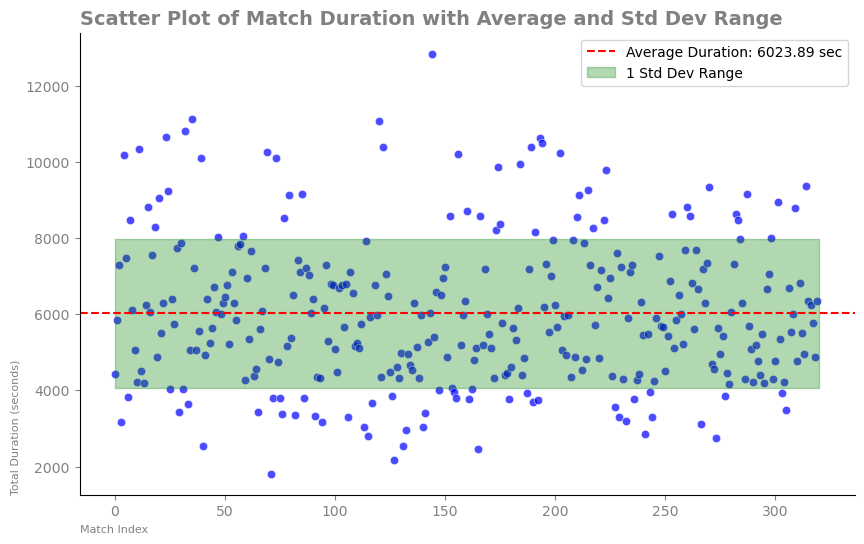

In [140]:
# جایگزینی مقادیر None با 0 برای محاسبه مجموع دوره‌ها
time_dataframe.fillna(0, inplace=True)

# محاسبه مجموع دوره‌ها (مدت زمان کل مسابقه) برای هر مسابقه
time_dataframe['total_duration'] = (
    time_dataframe['period_1'] +
    time_dataframe['period_2'] +
    time_dataframe['period_3'] +
    time_dataframe['period_4'] +
    time_dataframe['period_5']
)

# حذف بازی‌هایی که زمان مجموعشان صفر است
time_dataframe = time_dataframe[time_dataframe['total_duration'] > 0]

# محاسبه میانگین و انحراف معیار مدت زمان مسابقات
mean_duration = time_dataframe['total_duration'].mean()
std_duration = time_dataframe['total_duration'].std()

# تنظیمات اندازه نمودار
plt.figure(figsize=(10, 6))

# رسم نمودار پراکندگی فقط برای 1000 مسابقه اول
sns.scatterplot(x=range(min(320, len(time_dataframe))), y=time_dataframe['total_duration'][:1000], color='blue', alpha = 0.7)

# نمایش میانگین با یک خط افقی بر اساس محور Y (نقاط پراکندگی)
plt.axhline(y=mean_duration, color='red', linestyle='--', label=f'Average Duration: {mean_duration:.2f} sec')

# رسم ناحیه اطراف میانگین (± یک انحراف معیار)
plt.fill_betweenx(y=[mean_duration - std_duration, mean_duration + std_duration], 
                  x1=0, x2=320, color='green', alpha=0.3, label='1 Std Dev Range')

# عنوان و برچسب‌های نمودار
plt.title('Scatter Plot of Match Duration with Average and Std Dev Range', fontsize=14, color='gray', loc='left', fontweight='bold')
plt.xlabel('Match Index', fontsize=8, loc='left', color='gray')
plt.ylabel('Total Duration (seconds)', fontsize=8, loc='bottom', color='gray')

# تغییر رنگ اعداد و خطوط مدرج به خاکستری
plt.tick_params(colors='gray')

# حذف حاشیه‌های راست و بالا
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# نمایش توضیح خط میانگین و ناحیه انحراف معیار
plt.legend()

# نمایش نمودار
plt.show()


> ### How many sets are typically played in a tennis match?

In [112]:
time_dataframe

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp
0,11673958,1960,2457,None,None,None,1696097817
1,11673962,None,None,None,None,None,1696176527
2,11673963,3403,2431,None,None,None,1696091852
3,11673993,2894,2309,2084,None,None,1696160248
4,11674000,3177,None,None,None,None,1696089777
...,...,...,...,...,...,...,...
759,11703444,3615,2741,None,None,None,1696255224
760,11703445,3764,2468,None,None,None,1696254556
761,11703470,3104,2662,None,None,None,1696258777
762,11703524,2118,2754,None,None,None,1696256179


In [111]:
time_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   match_id                        764 non-null    int64 
 1   period_1                        320 non-null    object
 2   period_2                        319 non-null    object
 3   period_3                        107 non-null    object
 4   period_4                        0 non-null      object
 5   period_5                        0 non-null      object
 6   current_period_start_timestamp  329 non-null    object
dtypes: int64(1), object(6)
memory usage: 41.9+ KB


In [114]:
# 1. حذف سطرهایی که period_1 برابر با None است
time_dataframe_01 = time_dataframe[time_dataframe['period_1'].notna()]
# 2. حذف ستون‌های period_3 و period_4
time_dataframe_01.drop(columns=['period_4', 'period_5'])

# 3. محاسبه تعداد ست‌ها
# بررسی اینکه هر period مقدار دارد یا خیر
time_dataframe_01['sets_played'] = time_dataframe_01[['period_1', 'period_2']].gt(0).sum(axis=1)
time_dataframe_01




C:\Users\Battousai\AppData\Local\Temp\ipykernel_1992\569992980.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_dataframe_01['sets_played'] = time_dataframe_01[['period_1', 'period_2']].gt(0).sum(axis=1)


,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp,sets_played
0,11673958,1960,2457,None,None,None,1696097817,2
2,11673963,3403,2431,None,None,None,1696091852,2
3,11673993,2894,2309,2084,None,None,1696160248,2
4,11674000,3177,None,None,None,None,1696089777,1
5,11674008,3419,3438,3320,None,None,1696099675,2
...,...,...,...,...,...,...,...,...
759,11703444,3615,2741,None,None,None,1696255224,2
760,11703445,3764,2468,None,None,None,1696254556,2
761,11703470,3104,2662,None,None,None,1696258777,2
762,11703524,2118,2754,None,None,None,1696256179,2


In [120]:
# تعداد تکرار آن عدد
most_frequent_sets = time_dataframe_01['sets_played'].mode()[0]

# نمایش نتایج
print("sets are typically played in a tennis match:", most_frequent_sets)

sets are typically played in a tennis match: 2


> ### Which country has produced the most successful tennis players?

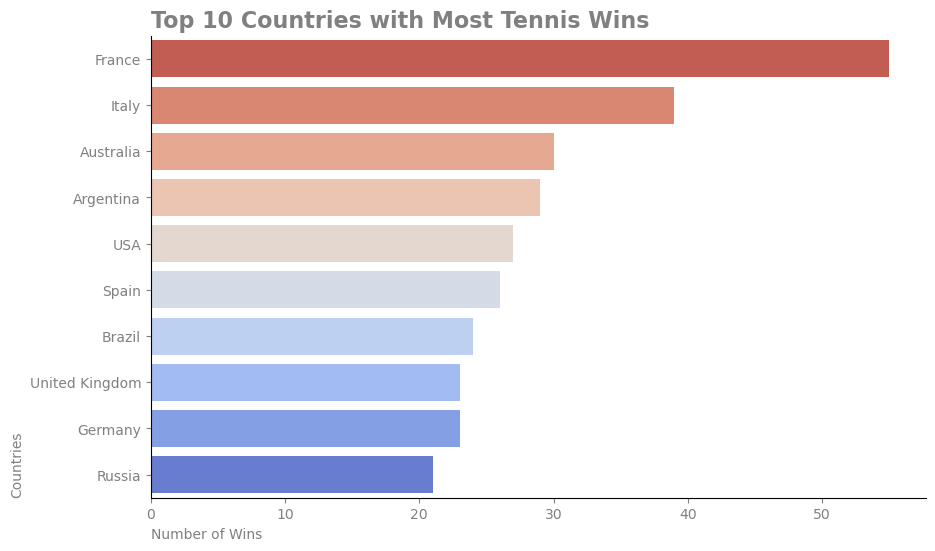

In [121]:


# فیلتر کردن مسابقات برنده شده توسط تیم خانه (برنده = 1)
home_wins = event_dataframe[event_dataframe['winner_code'] == 1]

# فیلتر کردن مسابقات برنده شده توسط تیم میهمان (برنده = 2)
away_wins = event_dataframe[event_dataframe['winner_code'] == 2]

# استخراج بازیکنانی که در تیم خانه برنده شده‌اند به همراه کشورشان
home_winners = home_wins.merge(home_team_dataframe[['match_id', 'player_id', 'country']], on='match_id', how='left')

# استخراج بازیکنانی که در تیم میهمان برنده شده‌اند به همراه کشورشان
away_winners = away_wins.merge(away_team_dataframe[['match_id', 'player_id', 'country']], on='match_id', how='left')

# ادغام لیست برندگان تیم خانه و تیم میهمان
all_winners = pd.concat([home_winners, away_winners])

# شمارش تعداد بردهای هر کشور
country_win_counts = all_winners['country'].value_counts()

# انتخاب 10 کشور برتر
top_countries = country_win_counts.head(10)



# تعریف palette اصلی
#original_palette = sns.color_palette('Greens_d')
# معکوس کردن palette
#reversed_palette = original_palette[:-1]
# رسم نمودار میله‌ای افقی برای 10 کشور برتر
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm_r')

# عنوان و برچسب‌های نمودار
plt.title('Top 10 Countries with Most Tennis Wins', fontsize=16, color='gray', loc='left', fontweight='bold')
plt.xlabel('Number of Wins', fontsize=10, color='gray', loc = 'left')
plt.ylabel('Countries', fontsize=10, color='gray', loc='bottom')

# تغییر رنگ اعداد و خطوط مدرج به خاکستری
plt.tick_params(colors='gray')

# حذف حاشیه‌های راست و بالا
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# نمایش نمودار
plt.show()


> ### What is the average number of aces per match?

In [122]:
statistics_dataframe

,match_id,period,statistic_category_name,statistic_name,home_stat,away_stat,compare_code,statistic_type,value_type,home_value,away_value,home_total,away_total
0,11674074,ALL,service,aces,1,2,2,positive,event,1,2,NaN,NaN
1,11674074,ALL,service,double_faults,1,3,2,negative,event,1,3,NaN,NaN
2,11674074,ALL,service,first_serve,34/52 (65%),26/57 (46%),1,positive,team,34,26,52.0,57.0
3,11674074,ALL,service,second_serve,17/18 (94%),28/31 (90%),1,positive,team,17,28,18.0,31.0
4,11674074,ALL,service,first_serve_points,25/34 (74%),11/26 (42%),1,positive,team,25,11,34.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12258,11703525,2ND,return,first_serve_return_points,8/28 (28%),6/19 (31%),2,positive,team,8,6,28.0,19.0
12259,11703525,2ND,return,second_serve_return_points,8/13 (61%),3/15 (20%),1,positive,team,8,3,13.0,15.0
12260,11703525,2ND,return,return_games_played,6,6,3,positive,event,6,6,NaN,NaN
12261,11703525,2ND,return,break_points_converted,1,0,1,positive,event,1,0,NaN,NaN


In [124]:
# فیلتر کردن ردیف‌های مربوط به آیس‌ها
aces_data = statistics_dataframe[statistics_dataframe['statistic_name'] == 'aces']

# جمع‌آوری تعداد آیس‌ها از دو طرف (تیم خانه و تیم میهمان)
# با فرض اینکه هر ردیف نمایانگر یک مسابقه باشد
total_home_aces = aces_data['home_value'].sum()  # مجموع آیس‌های تیم خانه
total_away_aces = aces_data['away_value'].sum()  # مجموع آیس‌های تیم میهمان

# جمع آوری کل آیس‌ها
total_aces = total_home_aces + total_away_aces

# تعداد منحصر به فرد مسابقات
total_matches = aces_data['match_id'].nunique()  # تعداد منحصر به فرد مسابقات

# محاسبه میانگین آیس‌ها در هر مسابقه
if total_matches > 0:  # جلوگیری از تقسیم بر صفر
    average_aces_per_match = total_aces / total_matches
else:
    average_aces_per_match = 0

print(f"Average aces per match: {average_aces_per_match:.2f}")

Average aces per match: 8.00
